# **Car Price Prediction using Linear Regression**

**Introduction**


The production rates of cars have been rising progressively during the past decade, with almost 92 million cars
being produced in the year 2019. This has provided the used car market with a big rise which has now come
into picture as a well-growing industry. The recent arrival of various online portals and websites has provided
with the need of the customers, clients, dealers and the sellers to be updated with the current scenario and
trends to know the actual value of any used car in the current market. While there are numerous applications of
machine learning in real life but one of the most pronounced application is it’s use in solving the prediction
problems. Again, there is an end number of topics on which the prediction can be done. This project is very
much focused and based upon one of such application. Making the use of a Machine Learning Algorithm such as
Linear Regression, and try to predict the price of a used car and build a statistical model based on provided
data with a given set of attributes.


**Business Understanding:**

The Kenyan automobile industry is positioned at the intersection of economic growth, urbanization, and shifting consumer preferences. With an increasing population and a rising demand for vehicles, the local automobile company aims to seize market opportunities and overcome challenges by adopting a data-driven approach. Collaborating with an automobile consulting firm, the company seeks comprehensive insights into the multifaceted factors influencing car pricing.


**Problem Statement**
In light of the complex dynamics in the Kenyan automobile industry, the local company faces the challenge of optimizing its pricing based on various independent variables. The primary objective is to develop a predictive model capable of accurately estimating car prices by understanding the relationship between car attributes and pricing, providing the company with a strategic advantage in a competitive marketplace.

The key objectives are:

-Identify significant variables that play a role in predicting the price of a car.


-Assess the effectiveness of these variables in describing the price of a car.

Dataset:

#### **Importing the dependencies**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import scipy.stats
from scipy.stats import zscore
from numpy import quantile
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, f_oneway
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the csv file into pandas dataframe and inspecting the first 5 rows
cars = pd.read_csv("data\cleaned_cars.csv") #index_col = 0
cars.head() 

,Make,YOM,Color,Used,Transmission,Mileage,Price,City
0,Nissan,2014,Black,Foreign Used,Automatic,136000.0,2050000,Nairobi
1,Nissan,2014,Silver,Foreign Used,Automatic,85000.0,1380000,Nairobi
2,Nissan,2013,Gray,Foreign Used,Automatic,90231.0,995000,Nairobi
3,Nissan,2014,White,Foreign Used,Automatic,52000.0,2500000,Nairobi
4,Nissan,2014,White,Foreign Used,Automatic,86532.0,1100000,Mombasa


In [4]:
# check the last 5 rows
cars.tail()

,Make,YOM,Color,Used,Transmission,Mileage,Price,City
45142,Alfa,2015,Black,Foreign Used,Automatic,86532.0,1800000,Nairobi
45143,Alfa,2016,White,Foreign Used,Automatic,75048.0,1500000,Nairobi
45144,Alfa,2002,Red,Kenyan Used,Automatic,72000.0,289000,Nairobi
45145,Alfa,1992,Blue,Kenyan Used,Manual,150000.0,300000,Nairobi
45146,Alfa,1987,Red,Kenyan Used,Manual,86532.0,80000,Kajiado


#### **Data Understanding**

**Make:** Information about the car brand it is a categorical column.

**YOM:** It is the year of manufacture.

**Color**  Physical appearance of the car like black, silver, etc.

**Used:** Has it been used locally,outside or it is brand new.

**Transmission:** is the car automatic, manual, cvt or amt.

**Mileage:** How much the car has driven before.

**City:** Shows the city the car is sold.

**Price:** The target column. The price of the car is based on the above information.

In [5]:
#checking the number of rows and columns
cars.shape
print("No of rows", cars.shape[0])
print("No of columns", cars.shape[1])

No of rows 45147
No of columns 8


#### **Get information about our dataset like the total number of rows, total number of columns, data type of each column and memory requirement**

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45147 entries, 0 to 45146
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          45147 non-null  object 
 1   YOM           45147 non-null  int64  
 2   Color         45147 non-null  object 
 3   Used          45147 non-null  object 
 4   Transmission  45147 non-null  object 
 5   Mileage       45147 non-null  float64
 6   Price         45147 non-null  int64  
 7   City          45147 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.8+ MB


In [7]:
#checking the number of missing values
cars.isnull().sum()

Make            0
YOM             0
Color           0
Used            0
Transmission    0
Mileage         0
Price           0
City            0
dtype: int64

- No null values spotted.

In [8]:
# Check for duplicates
duplicates = cars.duplicated()
duplicates_count = duplicates.sum()
print("Number of duplicate rows:", duplicates_count)

# Print the rows with duplicates
if duplicates_count > 0:
    duplicate_rows = cars[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows[:5])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 7871
Duplicate rows:
      Make   YOM   Color          Used Transmission  Mileage    Price     City
11  Nissan  2014   White  Foreign Used    Automatic  86532.0  1100000  Mombasa
14  Nissan  2015   Black  Foreign Used    Automatic  86532.0  2550000  Nairobi
22  Nissan  2014  Silver  Foreign Used    Automatic  86532.0  1150000  Nairobi
25  Nissan  2014  Silver  Foreign Used    Automatic  86532.0  1150000  Nairobi
27  Nissan  2014  Silver  Foreign Used    Automatic  86532.0  1150000  Nairobi


In [9]:
# Specify columns to consider for duplicates
columns_to_check = ['Make', 'YOM', 'Color','Mileage', 'City', 'Price', 'Used']

# Remove duplicate rows based on specified columns
cars_no_duplicates = cars.drop_duplicates(subset=columns_to_check)

# Verify the removal of duplicates
print("Number of rows after removing duplicates:", len(cars_no_duplicates))



Number of rows after removing duplicates: 37229


In [10]:
#checking the number of missing values
cars.isnull().sum()

Make            0
YOM             0
Color           0
Used            0
Transmission    0
Mileage         0
Price           0
City            0
dtype: int64

#### **Overal statistics about the dataset**

In [11]:
cars.describe()

,YOM,Mileage,Price
count,45147.000000,4.514700e+04,4.514700e+04
mean,2011.738100,9.979353e+04,1.967034e+06
std,4.499485,9.311228e+04,2.015689e+06
min,1957.000000,1.000000e+00,6.000000e+04
25%,2011.000000,7.000000e+04,8.000000e+05
50%,2014.000000,8.653200e+04,1.350000e+06
75%,2014.000000,1.090000e+05,2.350000e+06
max,2021.000000,1.980000e+06,2.840000e+07


# **Exploratory data analysis**

### **Univariate Analysis**

### **A)** Categorical

Inspecting the distribution of make,color,used,transmission and city column

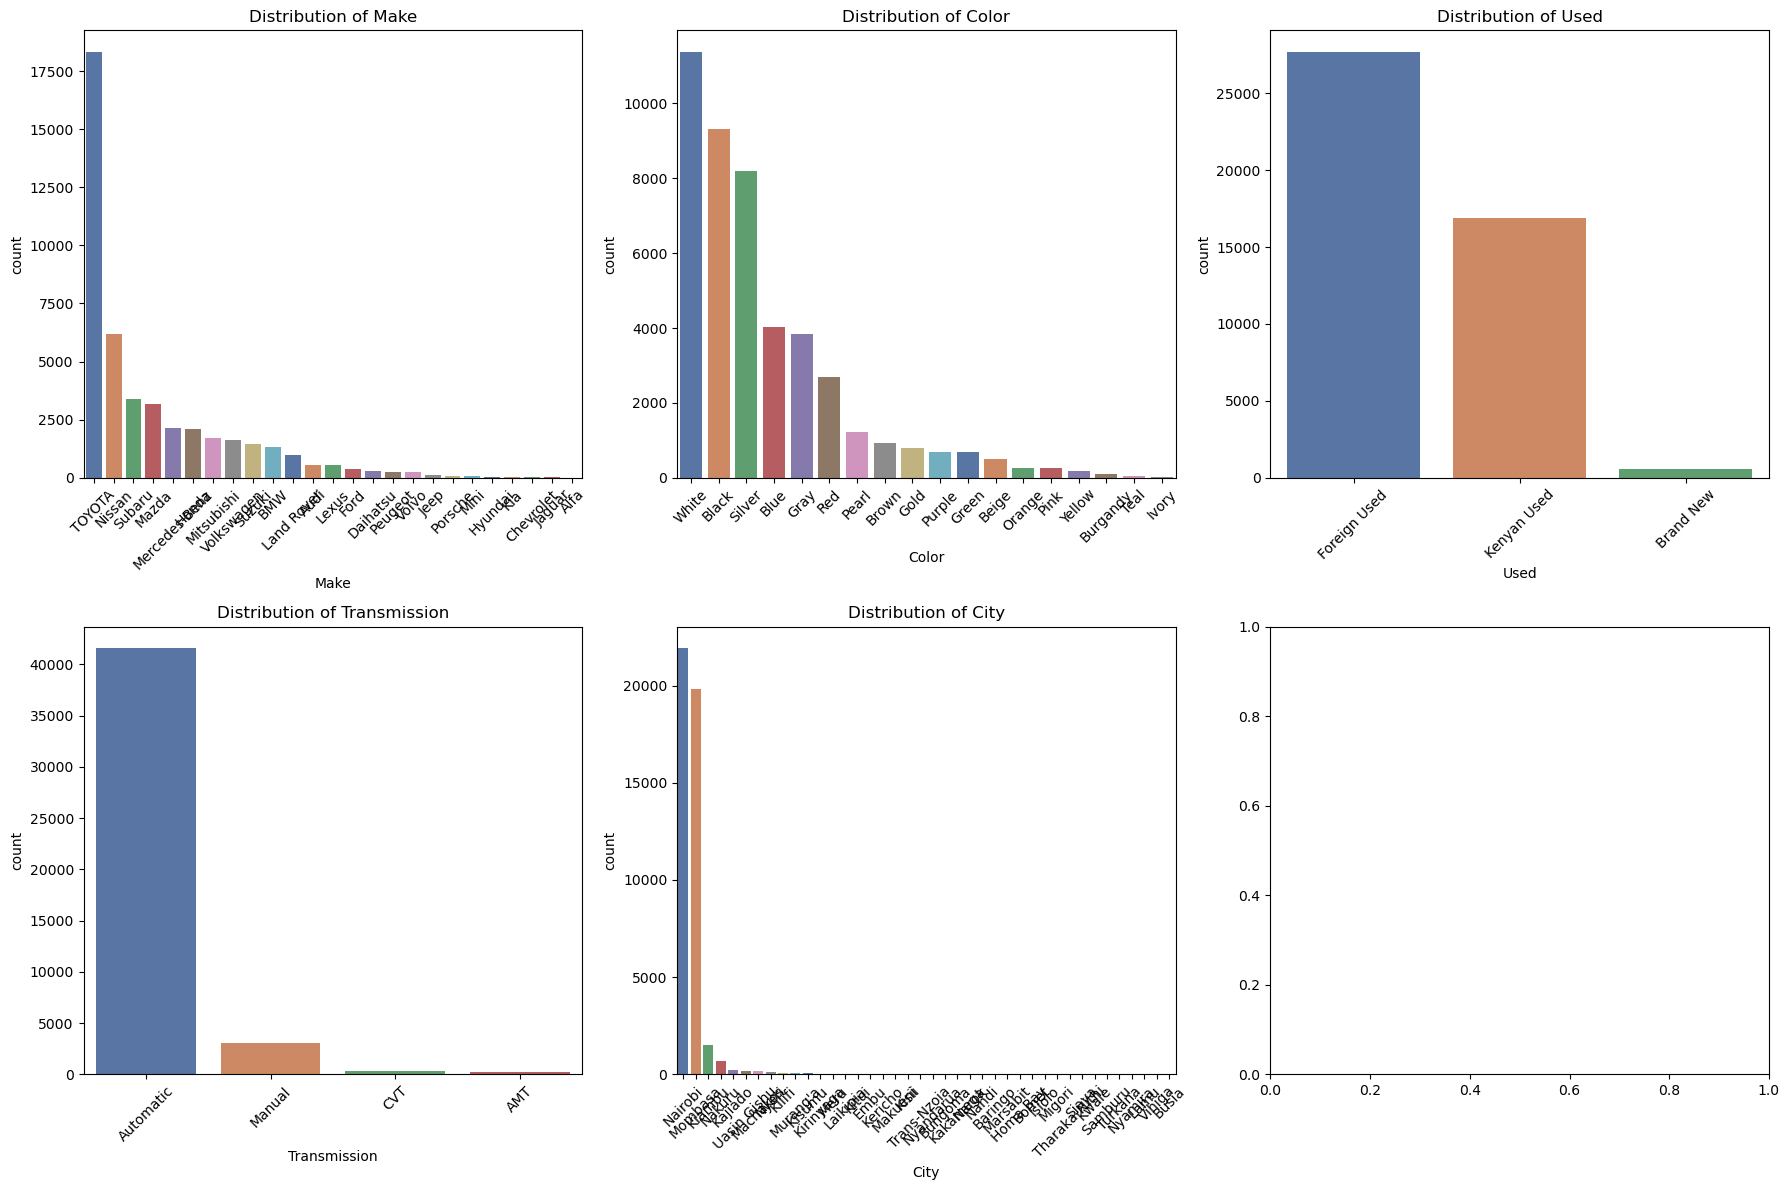

In [12]:
# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Flatten the axes for easier iteration
axes = axes.flatten()

# List of categorical variables
categorical_variables = ['Make','Color', 'Used', 'Transmission','City']

# Plot distribution for each variable
for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, data=cars, ax=axes[i], order=cars[variable].value_counts().index, palette='deep')  # Set2 is an example palette
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

# Adjust layout
plt.tight_layout()
# Save the plot as an image
plt.savefig("visuals/distributioncategorical.png")
plt.show()

### **B)** Numerical

-Price

Skewness: 3.578377
Kurtosis: 18.893035


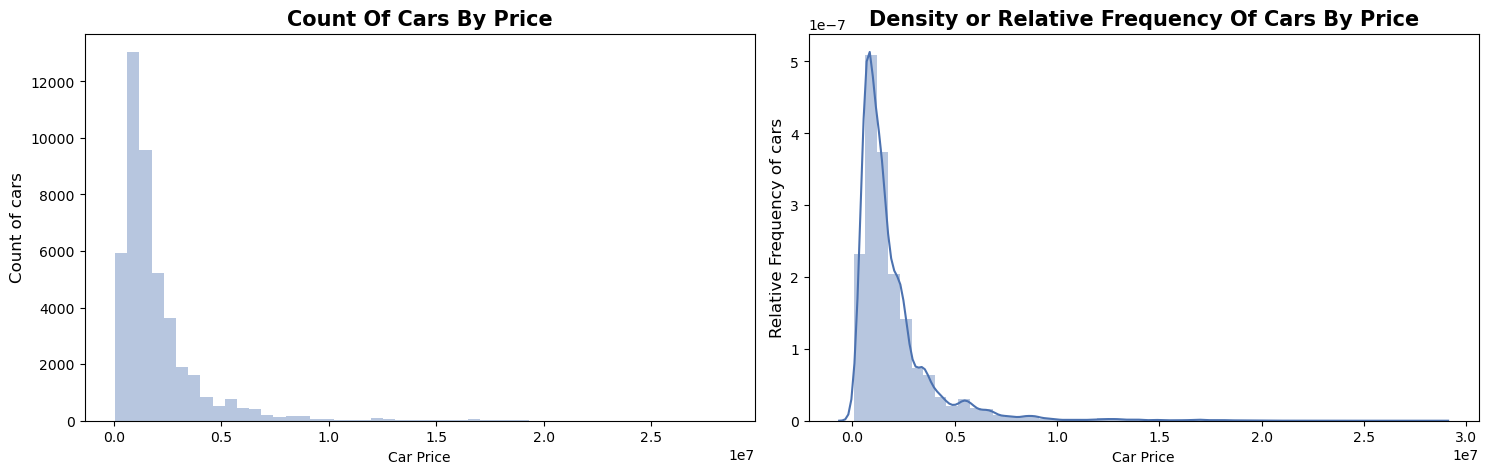

In [13]:
# Set the color palette
sns.set_palette('deep')

# Create subplots for Price distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot count of cars by price
sns.distplot(cars['Price'], norm_hist=False, kde=False, ax=ax[0])
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars', size=12)
ax[0].set_title('Count Of Cars By Price', size=15, weight="bold")

# Plot density or relative frequency of cars by price
sns.distplot(cars['Price'], kde=True, ax=ax[1])
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars', size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price', size=15, weight="bold")

# Show skewness and kurtosis
print("Skewness: %f" % cars['Price'].skew())
print("Kurtosis: %f" % cars['Price'].kurt())

# Adjust layout
plt.tight_layout()
plt.savefig("visuals/distributionPrice.png")
# Show the plots
plt.show()

The skewness is positive (3.58), indicating a right-skewed distribution, and the kurtosis is high (18.89), indicating heavy tails.

#### Distribution of Mileage and YOM

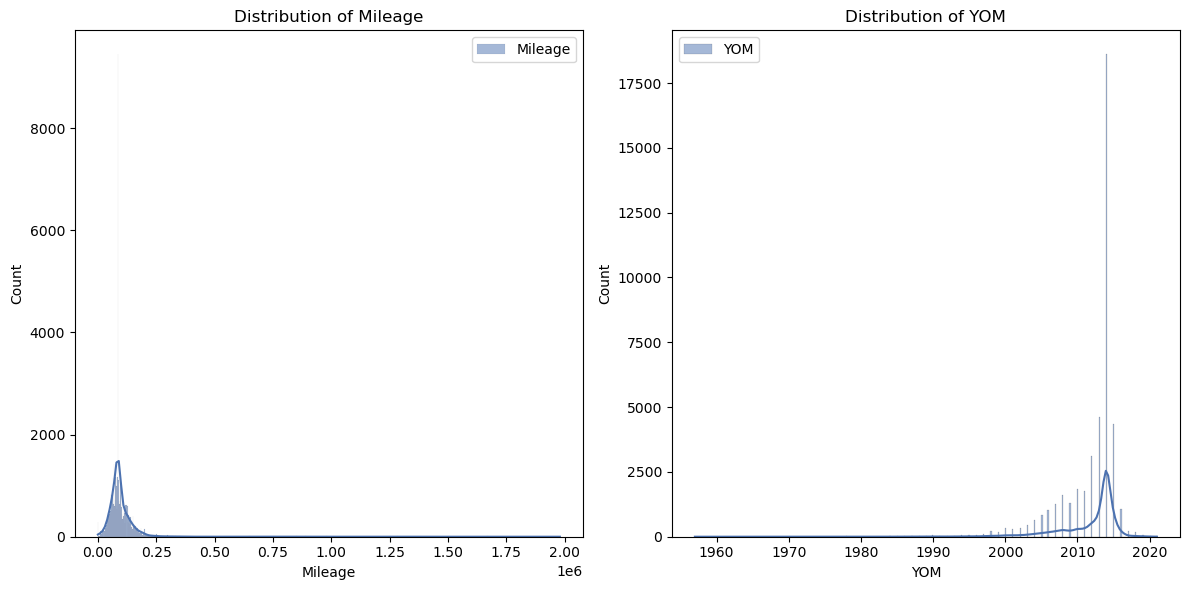

In [14]:
# Set the color palette
sns.set_palette('deep')

# Remove extra space from the column name
cars.rename(columns={'Mileage ': 'Mileage'}, inplace=True)

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histogram for Mileage
sns.histplot(x="Mileage", data=cars, kde=True, label="Mileage", ax=axes[0])
axes[0].set_title('Distribution of Mileage')
axes[0].legend()

# Plot histogram for YOM
sns.histplot(x="YOM", data=cars, kde=True, label="YOM", ax=axes[1])
axes[1].set_title('Distribution of YOM')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.savefig("visuals/distMileYom.png")
# Show the combined plot
plt.show()


#### **Outliers Detection**

Inspect outliers in numeric columns Mileage,Yom and Price

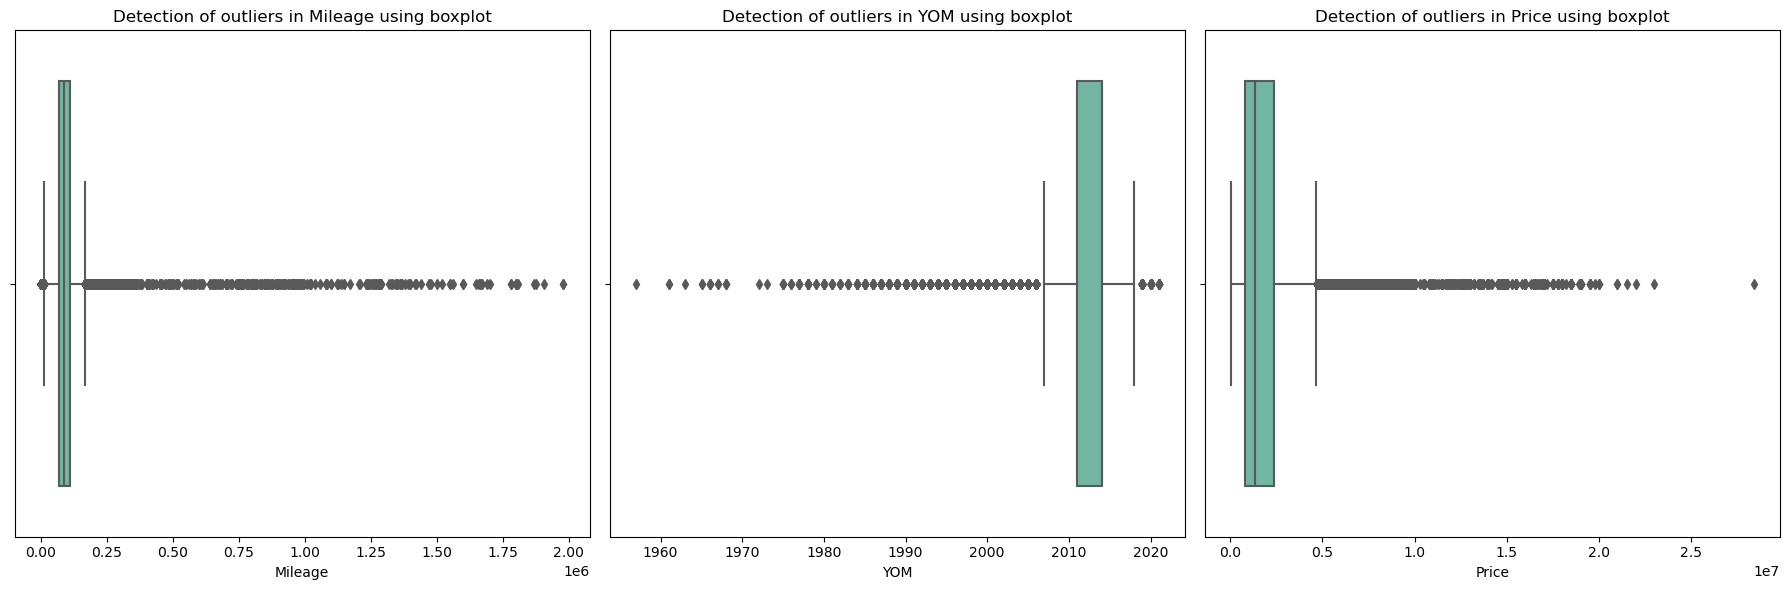

In [15]:
# Define numerical columns
num_col = ["Mileage", "YOM", "Price"]

# Set the color palette to 'Set2'
sns.set_palette('deep')

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(nrows=1, ncols=len(num_col), figsize=(18, 6))

# Iterate through numerical columns
for i, col in enumerate(num_col):
    sns.boxplot(x=cars[col], ax=axes[i], palette='Set2')
    axes[i].set_title("Detection of outliers in {} using boxplot".format(col))
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.savefig("visuals/outliers.png")
# Show the plots
plt.show()

In [16]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers

# Remove outliers in 'Price'
cars = remove_outliers_iqr(cars, 'Price')

# Remove outliers in 'YOM'
cars = remove_outliers_iqr(cars, 'YOM')

# Remove outliers in 'Mileage'
cars = remove_outliers_iqr(cars, 'Mileage')


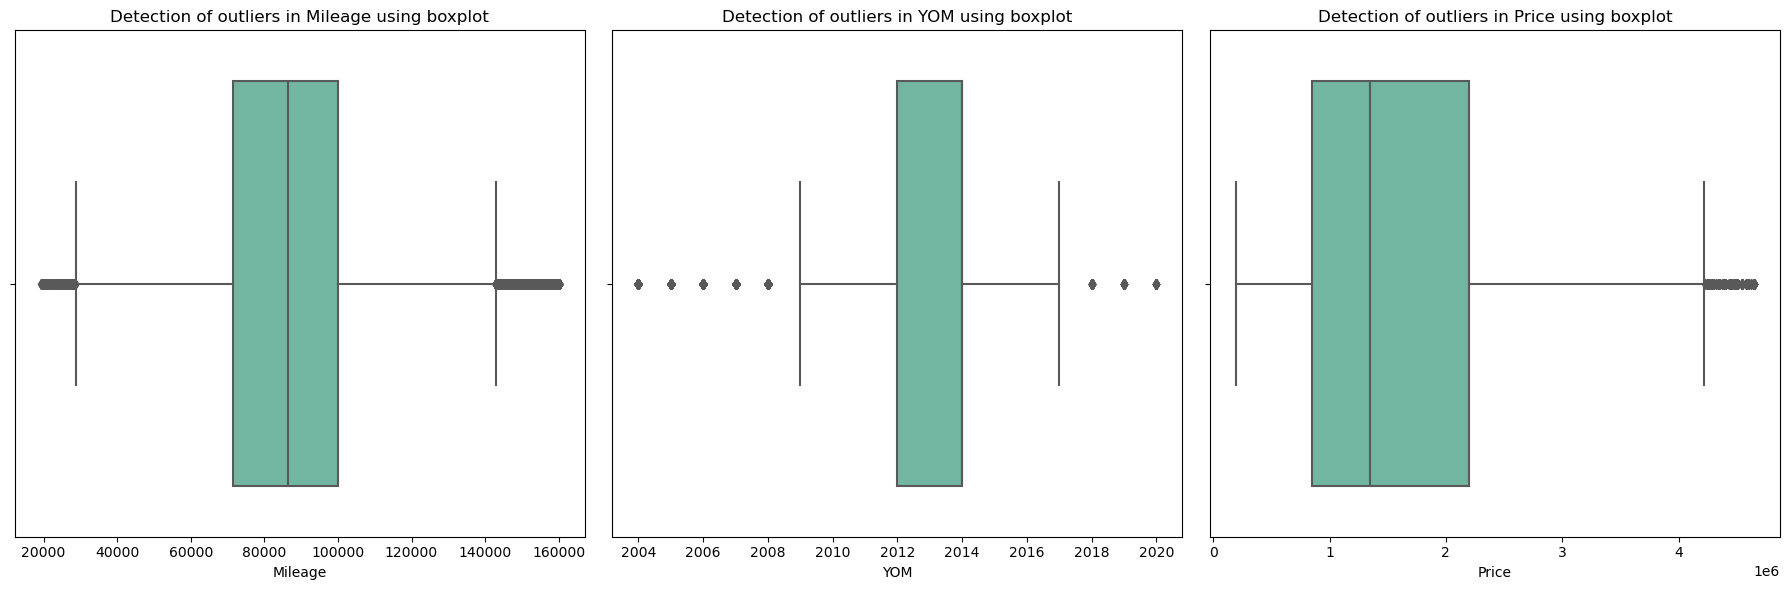

In [17]:
# Define numerical columns
num_col = ["Mileage", "YOM", "Price"]

# Set the color palette to 'Set2'
sns.set_palette('deep')

# Create subplots with one row and multiple columns
fig, axes = plt.subplots(nrows=1, ncols=len(num_col), figsize=(18, 6))

# Iterate through numerical columns
for i, col in enumerate(num_col):
    sns.boxplot(x=cars[col], ax=axes[i], palette='Set2')
    axes[i].set_title("Detection of outliers in {} using boxplot".format(col))
    axes[i].set_xlabel(col)

# Adjust layout
plt.tight_layout()
plt.savefig("visuals/outliers2.png")
# Show the plots
plt.show()

# **Bivariate Analysis**
- Analysis will be done for the target column price with independent features

#### **Used and Price**

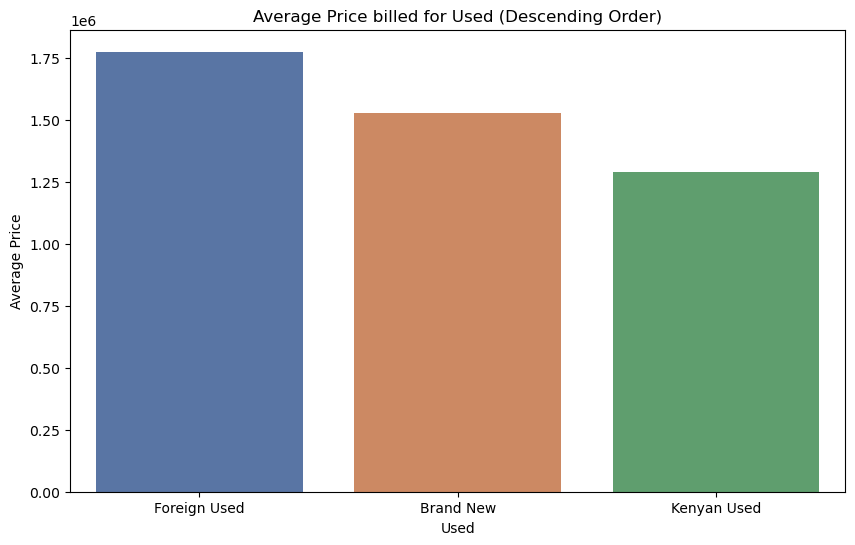

In [18]:
# Calculate the average price for each 'Used' category
average_prices = cars.groupby('Used')['Price'].mean().sort_values(ascending=False)

# Set the color palette to 'Set2'
sns.set_palette('deep')

# Create a bar plot with the 'Used' categories in descending order
plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices.index, y=average_prices.values)

plt.title("Average Price billed for Used (Descending Order)")
plt.xlabel('Used')
plt.ylabel('Average Price')
plt.savefig("visuals/Usedandprice.png")
plt.show()

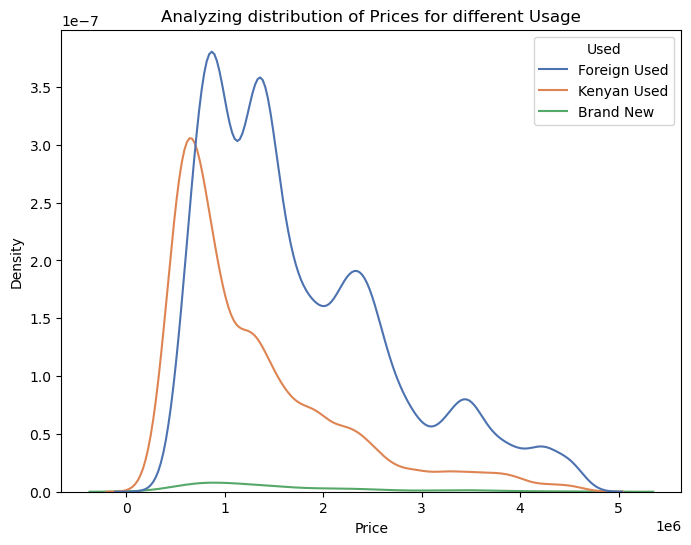

In [19]:
# Set the color palette to 'Set2'
sns.set_palette('deep')

# KDE plot for Price with hue based on 'Used'
plt.figure(figsize=(8, 6))
sns.kdeplot(x="Price", data=cars, hue="Used")

plt.title("Analyzing distribution of Prices for different Usage")
plt.savefig("visuals/Usedandpricedist.png")
plt.show()

#### **Transmission and Price**

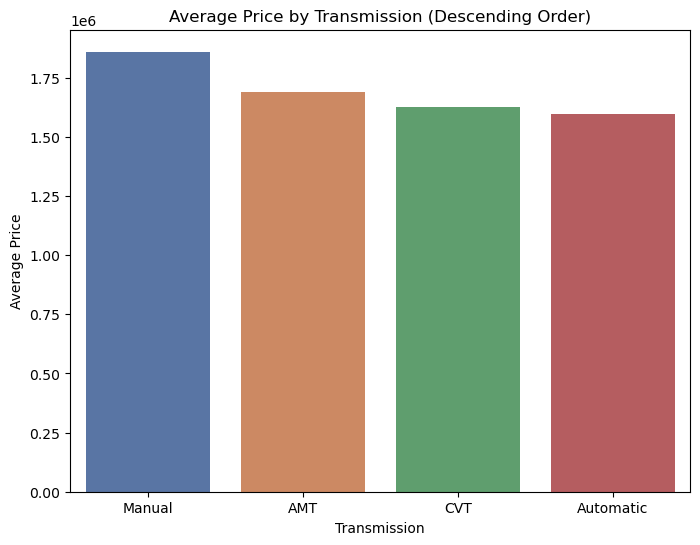

In [20]:
# Calculate the average price for each 'Transmission' category
average_prices = cars.groupby('Transmission')['Price'].mean().sort_values(ascending=False)

# Create a bar plot with the 'Transmission' categories in descending order
plt.figure(figsize=(8, 6))
sns.barplot(x=average_prices.index, y=average_prices.values, palette = 'deep')

plt.title("Average Price by Transmission (Descending Order)")
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.savefig("visuals/transmissionandprice.png")
plt.show()

#### **Make and Price**

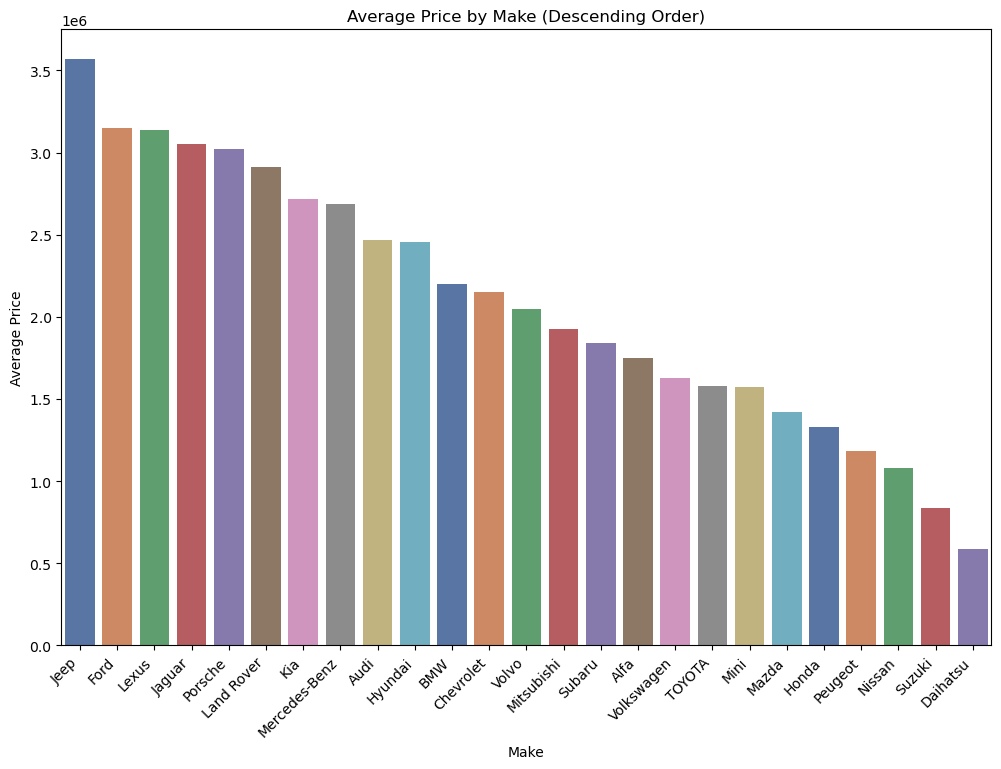

In [21]:
# Calculate the average price for each 'Make' category
average_prices = cars.groupby('Make')['Price'].mean().sort_values(ascending=False)

# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot with the 'Make' categories in descending order
sns.barplot(x=average_prices.index, y=average_prices.values, palette="deep",)

plt.title("Average Price by Make (Descending Order)")
plt.xlabel("Make")
plt.ylabel("Average Price")

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")
plt.savefig("visuals/makeandprice.png")

# Display the plot
plt.show()

#### **City and Price**

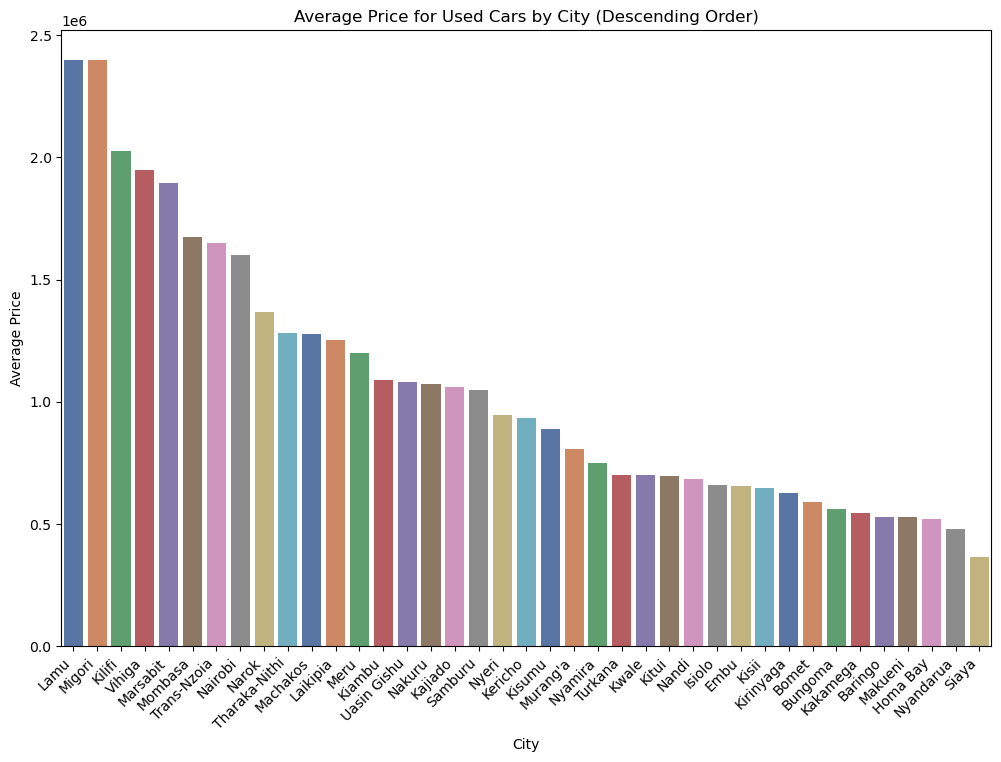

In [22]:

# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot with the 'City' categories in descending order
sns.barplot(x="City", y="Price", data=cars, ci=False, palette="deep", order=cars.groupby('City')['Price'].mean().sort_values(ascending=False).index)

plt.title("Average Price for Used Cars by City (Descending Order)")
plt.xlabel("City")
plt.ylabel("Average Price")

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")
plt.savefig("visuals/cityandprice.png")
# Display the plot
plt.show()

#### **Color and Price**

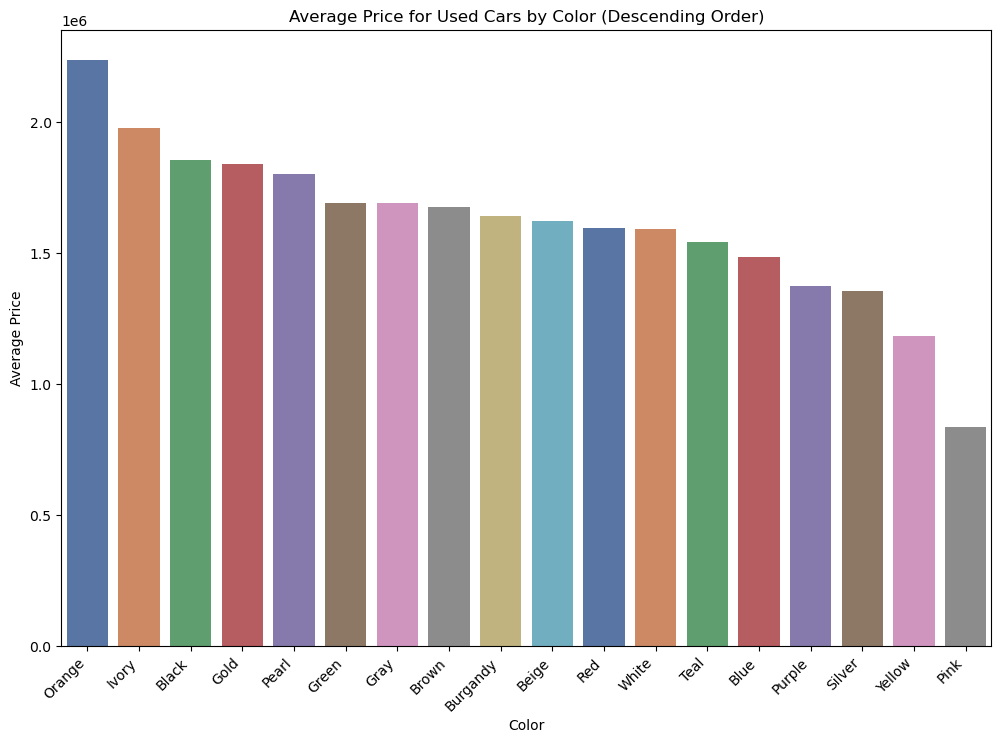

In [23]:
# Calculate the average price for each 'Color' category and sort them in descending order
average_prices = cars.groupby('Color')['Price'].mean().sort_values(ascending=False)

# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot with the 'Color' categories in descending order and using the 'Set2' color palette
sns.barplot(x=average_prices.index, y=average_prices.values, palette="deep", order=average_prices.index)

plt.title("Average Price for Used Cars by Color (Descending Order)")
plt.xlabel("Color")
plt.ylabel("Average Price")

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha="right")
plt.savefig("visuals/colorandprice.png")

# Display the plot
plt.show()

#### **scatterplots for numeric column and price distribution**

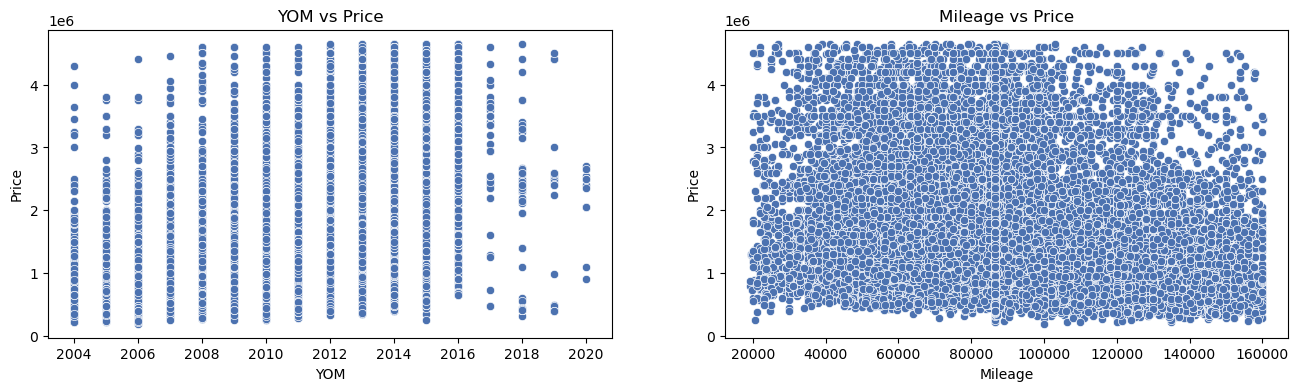

In [24]:
plt.figure(figsize=(16, 4))

# Create the first subplot for YOM vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(x=cars['YOM'], y=cars['Price'], palette='deep')
plt.title("YOM vs Price")

# Create the second subplot for Mileage vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(x=cars['Mileage'], y=cars['Price'], palette='deep')
plt.title("Mileage vs Price")
plt.savefig("visuals/scatternumericandprice.png")
plt.show()



# **Multivariate Analysis**

### Make,Transmission and Price

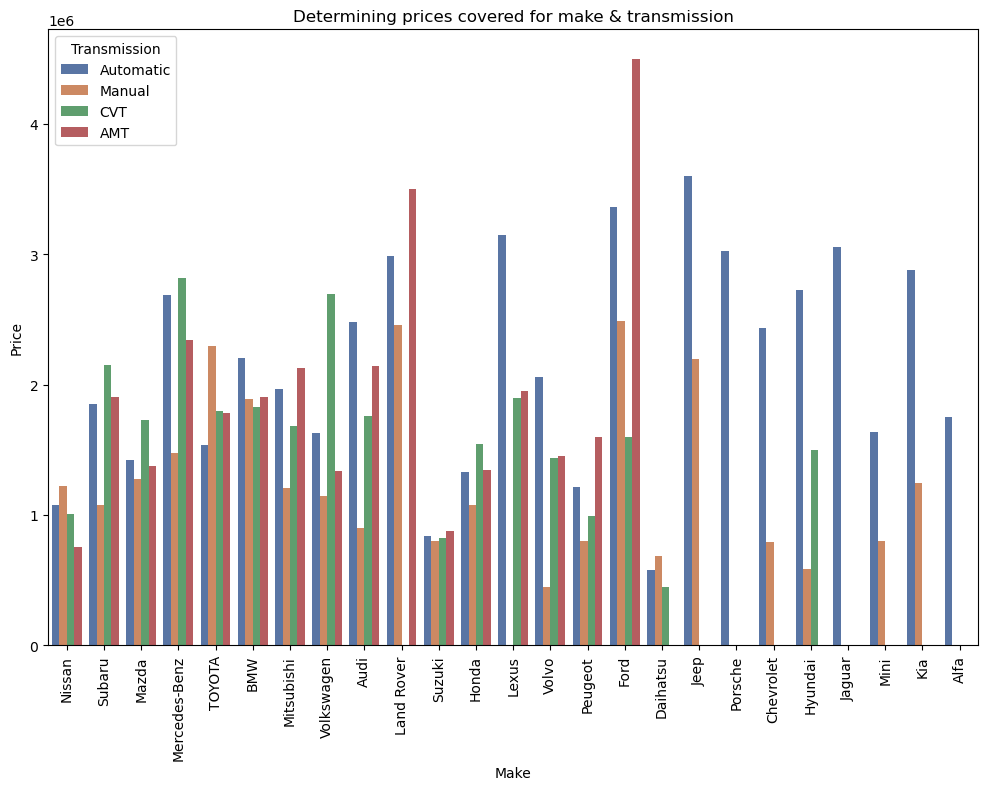

In [25]:
# Set a larger figure size and higher DPI
plt.figure(figsize=(12, 8), dpi=100)

# Create the bar plot
sns.barplot(x="Make", y="Price", data=cars, hue="Transmission", ci=False, palette="deep")
plt.title("Determining prices covered for make & transmission")

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)
plt.savefig("visuals/maketransmissionandprice.png")
# Show the plot
plt.show()



#### **Mileage,Used and Price**

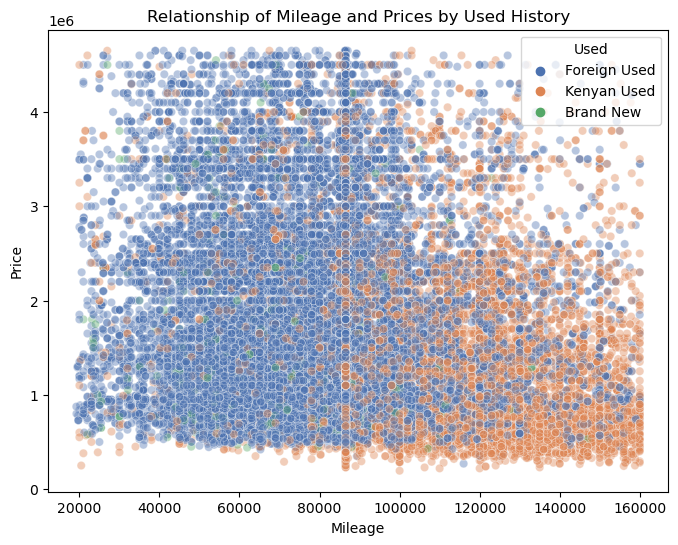

In [26]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Mileage", y="Price", data=cars, hue="Used",palette="deep", alpha=0.4)
plt.title("Relationship of Mileage and Prices by Used History")
plt.savefig("visuals/mileageUseandprice.png")
plt.show()

## **Chi-Square Statistic:**

The Chi-Square Statistic is a measure of how much the observed counts in the contingency table deviate from what would be expected if there were no association between the variables. A larger Chi-Square Statistic indicates a stronger association.
P-value:

The p-value associated with the Chi-Square Statistic is a measure of the evidence against a null hypothesis of no association. A very low p-value (close to zero) suggests that you reject the null hypothesis, indicating a significant association between the variables.

In [27]:
from scipy.stats import chi2_contingency

# Categorical outcome variable
outcome_variable = 'Price'

# List of categorical variables
categorical_variables = ['Color', 'Used', 'Transmission', 'Make', 'City']

# Create an empty list to store results
chi_square_results = []

# Statistical significance threshold
alpha = 0.05

# Chi-Square Test for Independence for each categorical variable
for cat_var in categorical_variables:
    contingency_table = pd.crosstab(cars[cat_var], cars[outcome_variable])
    
    # Perform Chi-Square Test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Check for statistical significance
    if p < alpha:
        significance = 'Significant'
    else:
        significance = 'Not Significant'
    
    # Append results to the list
    chi_square_results.append({
        'Variable': f"{cat_var} and {outcome_variable}",
        'Chi-Square Statistic': chi2,
        'P-value': p,
        'Significance': significance
    })

# Convert the list to a DataFrame
chi_square_results_df = pd.DataFrame(chi_square_results)

# Print the results DataFrame
print(chi_square_results_df)


                 Variable  Chi-Square Statistic  P-value Significance
0         Color and Price          24214.500674      0.0  Significant
1          Used and Price           7258.104317      0.0  Significant
2  Transmission and Price           6897.067391      0.0  Significant
3          Make and Price          60183.077626      0.0  Significant
4          City and Price          54315.157739      0.0  Significant


Color and Price:

Chi-Square Statistic: 24214.500674
P-value: 0.0
Significance: The p-value is very close to zero, indicating that there is a significant association between the 'Color' variable and 'Price.' The chi-square test rejects the null hypothesis of independence.
Used and Price:

Chi-Square Statistic: 7258.104317
P-value: 0.0
Significance: The p-value is very close to zero, suggesting a significant association between the 'Used' variable and 'Price.' The chi-square test rejects the null hypothesis of independence.
Transmission and Price:

Chi-Square Statistic: 6897.067391
P-value: 0.0
Significance: The p-value is very close to zero, indicating a significant association between the 'Transmission' variable and 'Price.' The chi-square test rejects the null hypothesis of independence.
Make and Price:

Chi-Square Statistic: 60183.077626
P-value: 0.0
Significance: The p-value is very close to zero, showing a significant association between the 'Make' variable and 'Price.' The chi-square test rejects the null hypothesis of independence.
City and Price:

Chi-Square Statistic: 54315.157739
P-value: 0.0
Significance: The p-value is very close to zero, indicating a significant association between the 'City' variable and 'Price.' The chi-square test rejects the null hypothesis of independence.
In summary, all the chi-square tests show very low p-values (close to zero), indicating strong evidence of associations between the respective categorical variables (Color, Used, Transmission, Make, City) and the 'Price' variable. The null hypothesis of independence is rejected in each case.

# **Encoding Variables**

This code snippet prepares the data for regression analysis by encoding categorical variables using label encoding and one-hot encoding. It also performs a log transformation on the target variable 'Price' ('log_price').

In [28]:
# Make a copy of the original DataFrame
cars_encoded = cars.copy()

# Columns for Label Encoding
label_encode_cols = ['Make', 'Transmission', 'Used','City']

# Apply Label Encoding
label_encoder = LabelEncoder()
cars_encoded[label_encode_cols] = cars_encoded[label_encode_cols].apply(label_encoder.fit_transform)

# Columns for One-Hot Encoding
one_hot_encode_cols = ['Color']

# Apply One-Hot Encoding
cars_encoded = pd.get_dummies(cars_encoded, columns=one_hot_encode_cols)

# Log Transformation on the Target Variable ('Price')
cars_encoded['log_price'] = np.log(cars_encoded['Price'])

# Display the first few rows of the encoded DataFrame
print(cars_encoded.head(3))


   Make   YOM  Used  Transmission   Mileage    Price  City  Color_Beige  \
0    17  2014     1             1  136000.0  2050000    25        False   
1    17  2014     1             1   85000.0  1380000    25        False   
2    17  2013     1             1   90231.0   995000    25        False   

   Color_Black  Color_Blue  ...  Color_Orange  Color_Pearl  Color_Pink  \
0         True       False  ...         False        False       False   
1        False       False  ...         False        False       False   
2        False       False  ...         False        False       False   

   Color_Purple  Color_Red  Color_Silver  Color_Teal  Color_White  \
0         False      False         False       False        False   
1         False      False          True       False        False   
2         False      False         False       False        False   

   Color_Yellow  log_price  
0         False  14.533350  
1         False  14.137594  
2         False  13.810498  

[3 rows 

In [29]:
# Replace 'False' with 0 and 'True' with 1 in all 'Color' columns
color_columns = [col for col in cars_encoded.columns if col.startswith('Color_')]
cars_encoded[color_columns] = cars_encoded[color_columns].replace({False: 0, True: 1})


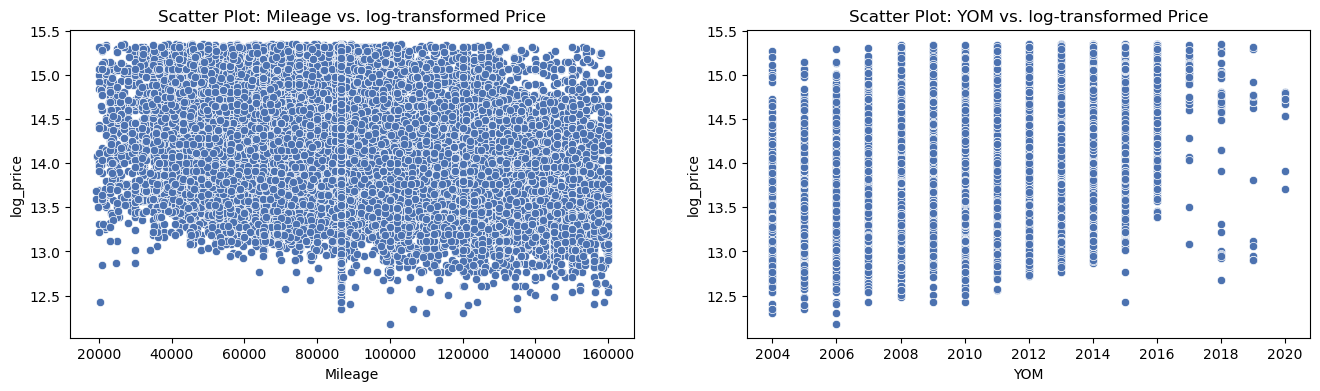

In [30]:
plt.figure(figsize=(16, 4))

# Create the first subplot for YOM vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(x='Mileage', y='log_price', data=cars_encoded, palette='deep')
plt.title('Scatter Plot: Mileage vs. log-transformed Price')
plt.xlabel('Mileage')
plt.ylabel('log_price')

# Create the second subplot for Mileage vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(x='YOM', y='log_price', data=cars_encoded, palette='deep')
plt.title('Scatter Plot: YOM vs. log-transformed Price')
plt.xlabel('YOM')
plt.ylabel('log_price')
plt.savefig("visuals/mileageyomvslogprice.png")
plt.show()


In [31]:
cars_encoded.columns

Index(['Make', 'YOM', 'Used', 'Transmission', 'Mileage', 'Price', 'City',
       'Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Brown',
       'Color_Burgandy', 'Color_Gold', 'Color_Gray', 'Color_Green',
       'Color_Ivory', 'Color_Orange', 'Color_Pearl', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Teal',
       'Color_White', 'Color_Yellow', 'log_price'],
      dtype='object')

In [32]:
cars_encoded.head(3)

,Make,YOM,Used,Transmission,Mileage,Price,City,Color_Beige,Color_Black,Color_Blue,...,Color_Orange,Color_Pearl,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Teal,Color_White,Color_Yellow,log_price
0,17,2014,1,1,136000.0,2050000,25,0,1,0,...,0,0,0,0,0,0,0,0,0,14.533350
1,17,2014,1,1,85000.0,1380000,25,0,0,0,...,0,0,0,0,0,1,0,0,0,14.137594
2,17,2013,1,1,90231.0,995000,25,0,0,0,...,0,0,0,0,0,0,0,0,0,13.810498


In [33]:
# Drop the original 'Price' column
cars_encoded.drop('Price', axis=1, inplace=True)

Assess the multicollinearity among the selected variables in the context of linear regression models.

In [34]:
def calculate_vif(data_frame):
    variables = data_frame.values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in range(data_frame.shape[1])]
    return vif_data

# Select columns for VIF analysis
columns =['Make', 'YOM', 'Used', 'Transmission', 'Mileage','City','log_price', 'Color_Beige', 
           'Color_Black', 'Color_Blue', 'Color_Brown', 'Color_Burgandy', 'Color_Gold', 'Color_Gray', 
           'Color_Green', 'Color_Ivory', 'Color_Orange', 'Color_Pearl', 'Color_Pink', 
           'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Teal', 'Color_White', 'Color_Yellow']

# Create a DataFrame with numeric variables
numeric_data = cars_encoded[columns]

# Calculate and display VIF
vif_result = calculate_vif(numeric_data)
print(vif_result)


          Variable            VIF
0             Make       1.026068
1              YOM       2.191496
2             Used       2.113932
3     Transmission       1.035472
4          Mileage       1.369893
5             City       1.011883
6        log_price       1.240326
7      Color_Beige   10242.378687
8      Color_Black  257335.755453
9       Color_Blue  112902.747291
10     Color_Brown   25652.761427
11  Color_Burgandy    2664.859655
12      Color_Gold   18666.147032
13      Color_Gray  107188.160096
14     Color_Green   14248.416607
15     Color_Ivory     809.876555
16    Color_Orange    6469.971440
17     Color_Pearl   35089.028022
18      Color_Pink    8329.293236
19    Color_Purple   21809.530470
20       Color_Red   79100.997342
21    Color_Silver  228834.392898
22      Color_Teal    1517.463002
23     Color_White  303747.477200
24    Color_Yellow    4685.652367


Low VIF (Close to 1):

Make: VIF = 1.026068

YOM (Year of Manufacture): VIF = 2.191496

Used: VIF = 2.113932

Transmission: VIF = 1.035472

Mileage: VIF = 1.369893

City: VIF = 1.011883

log_price: VIF = 1.240326

These variables have low VIF, indicating low correlation with other variables. Generally, VIF values below 5 are considered acceptable. the rest have  moderate to high VIF, suggesting potential multicollinearity issues. 

In [35]:
# List of color variables to drop
colors_to_drop = ['Color_Beige', 'Color_Black', 'Color_Blue', 'Color_Gold', 'Color_Gray',
                  'Color_Green', 'Color_Pearl', 'Color_Purple', 'Color_Red', 'Color_Silver',
                  'Color_White']

# Drop the specified color variables from cars_encoded
cars_encoded= cars_encoded.drop(columns=colors_to_drop)

# Display the updated DataFrame
print(cars_encoded.head(2))


   Make   YOM  Used  Transmission   Mileage  City  Color_Brown  \
0    17  2014     1             1  136000.0    25            0   
1    17  2014     1             1   85000.0    25            0   

   Color_Burgandy  Color_Ivory  Color_Orange  Color_Pink  Color_Teal  \
0               0            0             0           0           0   
1               0            0             0           0           0   

   Color_Yellow  log_price  
0             0  14.533350  
1             0  14.137594  


In [36]:
# Check the data types of columns after encoding
print(cars_encoded.dtypes)

Make                int32
YOM                 int64
Used                int32
Transmission        int32
Mileage           float64
City                int32
Color_Brown         int64
Color_Burgandy      int64
Color_Ivory         int64
Color_Orange        int64
Color_Pink          int64
Color_Teal          int64
Color_Yellow        int64
log_price         float64
dtype: object


In [37]:
cars_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36778 entries, 0 to 45143
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Make            36778 non-null  int32  
 1   YOM             36778 non-null  int64  
 2   Used            36778 non-null  int32  
 3   Transmission    36778 non-null  int32  
 4   Mileage         36778 non-null  float64
 5   City            36778 non-null  int32  
 6   Color_Brown     36778 non-null  int64  
 7   Color_Burgandy  36778 non-null  int64  
 8   Color_Ivory     36778 non-null  int64  
 9   Color_Orange    36778 non-null  int64  
 10  Color_Pink      36778 non-null  int64  
 11  Color_Teal      36778 non-null  int64  
 12  Color_Yellow    36778 non-null  int64  
 13  log_price       36778 non-null  float64
dtypes: float64(2), int32(4), int64(8)
memory usage: 3.6 MB


In [38]:
cars_encoded.isnull().sum()

Make              0
YOM               0
Used              0
Transmission      0
Mileage           0
City              0
Color_Brown       0
Color_Burgandy    0
Color_Ivory       0
Color_Orange      0
Color_Pink        0
Color_Teal        0
Color_Yellow      0
log_price         0
dtype: int64

#### **Correlation Matrix**

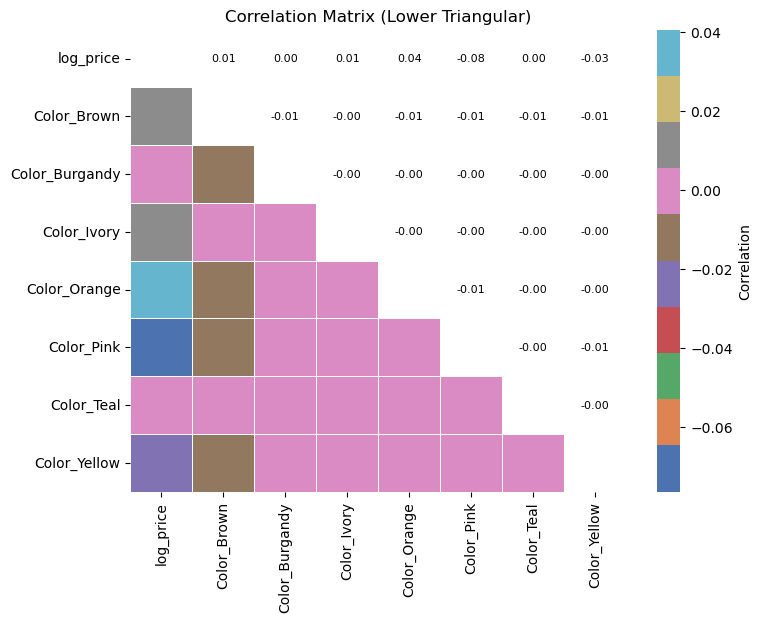

In [39]:
# Select relevant columns for correlation analysis
correlation_columns = ['log_price', 'Color_Brown','Color_Burgandy',  'Color_Ivory',
                        'Color_Orange', 'Color_Pink', 'Color_Teal', 'Color_Yellow']

# Create a subset of the DataFrame with the selected columns
correlation_subset = cars_encoded[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_subset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))
# Use a deep seaborn color palette
deep_palette = sns.color_palette("deep")
# Draw the heatmap with the mask and correct aspect ratio
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, mask=mask, cmap=deep_palette, linewidths=.5, annot=True, fmt=".2f", cbar_kws={'label': 'Correlation'})

# Add annotations manually
for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"
        heatmap.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=8, color='black')

plt.title("Correlation Matrix (Lower Triangular)")
plt.savefig("visuals/corrColors.png")
plt.show()

Positive Correlations:

Color_Brown has a positive correlation of 0.04 with log_price.
Color_Burgandy has positive correlations with other colors (Color_Ivory, Color_Orange, Color_Pink, Color_Teal, and Color_Yellow), but the magnitudes are quite small (around 0.01).
Negative Correlations:

Color_Brown has a negative correlation of -0.03 with Color_Ivory.
Color_Teal has a negative correlation of -0.06 with Color_Yellow.
Weak Correlations:

The correlations between Color_Ivory, Color_Orange, Color_Pink, and Color_Teal are generally weak, ranging from -0.02 to 0.04.

# Analysis Of Variance Test (ANOVA) 
Test whether the means of two or more independent samples are significantly different from dependent sample

In the context of the ANOVA tests:

If the p-value is less than or equal to the significance level (commonly 0.05), you would reject the null hypothesis.
If the p-value is greater than the significance level, you would fail to reject the null hypothesis.

Test whether the means of two independent samples are significantlly different from dependent sample.



- **Make:**

Null Hypothesis (H0): There is no significant difference in the mean "Price" across different car makes.

Alternative Hypothesis (H1): There is a significant difference in the mean "Price" across different car makes.


**Color:**

Null Hypothesis (H0): There is no significant difference in the mean "Price" across different car colors.

Alternative Hypothesis (H1): There is a significant difference in the mean "Price" across different car colors.

**Mileage:**

Null Hypothesis (H0): There is no significant difference in the mean "Price" between used cars and other Mileage.

Alternative Hypothesis (H1): There is a significant difference in the mean "Price" between used cars and other Mileage.

**Used:**

Null Hypothesis (H0): There is no significant difference in the mean "Price" between used cars and other Used.

Alternative Hypothesis (H1): There is a significant difference in the mean "Price" between used cars and other Used.

**Transmission:**

Null Hypothesis (H0): There is no significant difference in the mean "Price" across different transmission types.

Alternative Hypothesis (H1): There is a significant difference in the mean "Price" across different transmission types.

In [40]:
# Perform one-way ANOVA for categorical variables
for categorical_column in ["Make",'Mileage', "Used", "Transmission"]:
    grouped_data = cars_encoded.groupby(categorical_column)["log_price"].apply(list)
    f_statistic, p_value = f_oneway(*grouped_data)
    print(f"ANOVA results for {categorical_column}: F-statistic = {f_statistic}, p-value = {p_value}")

ANOVA results for Make: F-statistic = 492.5722997928368, p-value = 0.0
ANOVA results for Mileage: F-statistic = 1.5975921716961003, p-value = 6.64626168255279e-168
ANOVA results for Used: F-statistic = 1784.0201517540784, p-value = 0.0
ANOVA results for Transmission: F-statistic = 32.48109062213681, p-value = 5.869313262794054e-21


**ANOVA results for Make:**

F-statistic: 492.57

p-value: 0.0

Interpretation:
The p-value of 0.0 is less than the significance level (commonly set at 0.05), indicating that there is a significant difference in log_price across different categories of 'Make'. The F-statistic further supports this, suggesting that the variance in log_price is not due to random chance alone, but there are significant differences between the groups.


**ANOVA results for Mileage:**


F-statistic: 1.60

p-value: 6.65e-168

Interpretation:
The p-value is very close to zero, indicating strong evidence against the null hypothesis. The F-statistic suggests that there are significant differences in log_price across different levels of 'Mileage'. This means that Mileage is a significant factor in explaining the variance in log_price.Therefore the null hypothesis is rejected.


**ANOVA results for Used:**

F-statistic: 1784.02
p-value: 0.0
Interpretation:
The p-value is extremely low, indicating a significant difference in log_price based on the 'Used' status of the cars. The high F-statistic reinforces this, suggesting that the variation in log_price is not due to random chance but is significantly influenced by whether a car is used or not.Therefore the null hypothesis is rejected.


**ANOVA results for Transmission:**

F-statistic: 32.48
p-value: 5.87e-21
Interpretation:
The p-value is very low, indicating strong evidence against the null hypothesis. The F-statistic suggests a significant difference in log_price based on the type of 'Transmission'. This variable is a statistically significant predictor of log_price.Therefore the null hypothesis is rejected.

 ANOVA results indicate that the variables (Make, Mileage, Used, Transmission) are significant predictors of log_price, as their p-values are less than the chosen significance level.

#### **ANOVA Analysis for City and log-price**

Null Hypothesis (H0): The mean prices are equal across all city.

Alternative Hypothesis (H1): At least one city has a different mean price.

In [41]:
# Get unique locations from the 'City' column
cities = cars_encoded['City'].unique()

# Create a dictionary to store prices for each location
cities_prices = {location: cars_encoded[cars_encoded['City'] == location]['log_price'] for location in cities}

# Perform ANOVA
f_statistic, p_value = f_oneway(*cities_prices.values())

# Print ANOVA results
print(f"ANOVA results for city: F-statistic = {f_statistic}, p-value = {p_value}")

ANOVA results for city: F-statistic = 37.72032239995996, p-value = 9.352988343832281e-271


The ANOVA results for city indicate a highly significant relationship between the 'city' variable and the 'log_price'. 

F-statistic: 37.72
p-value: 9.35e-271

The low p-value (close to zero) suggests that the mean log_price is significantly different across different levels of the 'city' variable. This means that the city where a car is sold has a significant impact on its log_price.

Given the extremely low p-value, the null hypothesis is rejected, which assumes that there is no significant difference in log_price across different city. The data provides strong evidence to the contrary, supporting the idea that the city is a crucial factor in determining the log_price of the cars.

# Correlation Test
### Pearson's Correlation Coefficient
- Test whether two samples have a linear relationship

H0 : The color and prices are independent

H1 : There is a dependency between the color and prices

In [42]:
# List of color columns
color_columns = ['Color_Brown','Color_Burgandy',  'Color_Ivory',
                        'Color_Orange', 'Color_Pink', 'Color_Teal', 'Color_Yellow']

# Iterate through each color column and perform the correlation test
for color_column in color_columns:
    color = cars_encoded[color_column].values
    prices = cars_encoded["log_price"].values

    # Calculate the Pearson correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(color, prices)

    # Check the p-value and print the result
    print(f"For color {color_column}:")
    if p_value > 0.05:
        print(f"Pearson's correlation coefficient: {correlation_coefficient}")
        print("We cannot reject the null hypothesis. Color and Price are not dependent and have no linear relationship.")
    else:
        print(f"Pearson's correlation coefficient: {correlation_coefficient}")
        print("We reject the null hypothesis. Color and Price are dependent and have a linear relationship.")
    print("\n")

For color Color_Brown:
Pearson's correlation coefficient: 0.007321676586027044
We cannot reject the null hypothesis. Color and Price are not dependent and have no linear relationship.


For color Color_Burgandy:
Pearson's correlation coefficient: 0.0019739029787263817
We cannot reject the null hypothesis. Color and Price are not dependent and have no linear relationship.


For color Color_Ivory:
Pearson's correlation coefficient: 0.009954129761031756
We cannot reject the null hypothesis. Color and Price are not dependent and have no linear relationship.


For color Color_Orange:
Pearson's correlation coefficient: 0.04051434008812749
We reject the null hypothesis. Color and Price are dependent and have a linear relationship.


For color Color_Pink:
Pearson's correlation coefficient: -0.0762625589028803
We reject the null hypothesis. Color and Price are dependent and have a linear relationship.


For color Color_Teal:
Pearson's correlation coefficient: 0.0006021371874292379
We cannot rej

In [43]:
# Extract relevant columns
yom = cars_encoded['YOM']
mileage = cars_encoded['Mileage']
price = cars_encoded['log_price']

# Calculate the correlation coefficients and p-values
corr_yom_price, p_yom_price = pearsonr(yom, price)
corr_mileage_price, p_mileage_price = pearsonr(mileage, price)

# Print the results
print(f'Correlation between YOM and Price: {corr_yom_price:.4f}, p-value: {p_yom_price:.4f}')
print(f'Correlation between Mileage and Price: {corr_mileage_price:.4f}, p-value: {p_mileage_price:.4f}')

Correlation between YOM and Price: 0.3539, p-value: 0.0000
Correlation between Mileage and Price: -0.2381, p-value: 0.0000


**Correlation between YOM and Price:**

Correlation Coefficient (r) = 0.3539: This positive correlation coefficient suggests a moderate positive linear relationship between the Year of Manufacture (YOM) and the Price of cars. As the Year of Manufacture increases, the Price tends to increase as well.
p-value = 0.0000: The p-value is very close to zero (p < 0.05), indicating that the correlation is statistically significant. This means that it's highly unlikely to observe such a correlation by random chance.
Interpretation:

Newer cars (higher YOM) tend to have higher prices, indicating that buyers are willing to pay more for recently manufactured vehicles.

**Correlation between Mileage and Price:**

Correlation Coefficient (r) = -0.2381: This negative correlation coefficient suggests a moderate negative correlation negative linear relationship between Mileage and the Price of cars. As Mileage increases, the Price tends to decrease.The negative correlation implies an inverse relationship; as one variable increases, the other tends to decrease.
p-value = 0.0000: The p-value is very close to zero (p < 0.05), indicating that the correlation is statistically significant. This means that it's highly unlikely to observe such a correlation by random chance.
Interpretation:

There is a moderate negative correlation between Mileage and Price. Generally, cars with lower mileage may be priced higher, reflecting the common expectation that lower mileage is associated with less wear and tear.

In summary, the correlation analysis suggests that both Year of Manufacture (YOM) and Mileage are statistically significant factors correlated with the Price of cars. The interpretation provides insights into the direction and strength of these relationships.

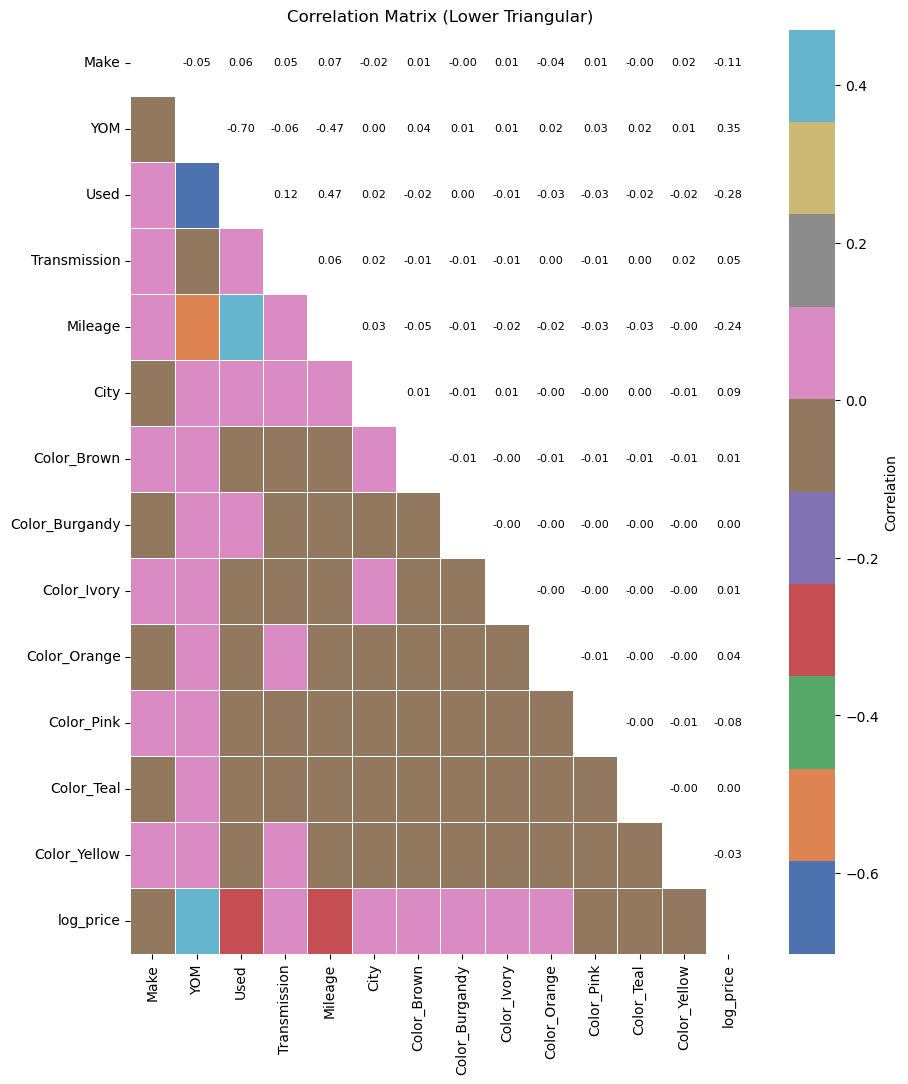

In [44]:
# Calculate the correlation matrix
correlation_matrix = cars_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 12))
# Use a deep seaborn color palette
deep_palette = sns.color_palette("deep")
# Draw the heatmap with the mask and correct aspect ratio
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, mask=mask, cmap=deep_palette, linewidths=.5, annot=True, fmt=".2f", cbar_kws={'label': 'Correlation'})

# Add annotations manually
for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        text = f"{correlation_matrix.iloc[i, j]:.2f}"
        heatmap.text(j + 0.5, i + 0.5, text, ha='center', va='center', fontsize=8, color='black')

plt.title("Correlation Matrix (Lower Triangular)")
plt.savefig("visuals/corrdataset.png")
plt.show()

# Linear Regression
- Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

- This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.


- In this section the linear regression model predicts price by using all the other features. The price column is a numerical column. 

- The regression problem tackled is a multiple regression as more than one input is fed to the linear regression  to get a single output(price). It is also a univariate regression problem as we are trying to predict a single value. The multivariate regression problem is used when we need to predict more than a single value.


# Metrics for Performace Evaluation
- Following are the common metrics used to evaluate linear regression model performance.

### Root Mean Squared Error (RMSE)
- RMSE is the square root of the mean of the square of all of the error. RMSE is considered an excellent general-purpose error metric for numerical predictions. RMSE is a good measure of accuracy, but only to compare prediction errors of different models or model configurations for a particular variable and not between variables, as it is scale-dependent. It is the measure of how well a regression line fits the data points. The formula for calculating RMSE is:


- yi^ = Predicted
- yi = Actual
- n = number of obervations

### Mean Absolute Error
- Mean Absolute Error calculates the average difference between the calculated values and actual values. It is also known as scale-dependent accuracy as it calculates error in observations taken on the same scale.It calculates errors between actual values and values predicted by the model. 
- Mean Absolute Error (MAE) is calculated by taking the summation of the absolute difference between the actual and calculated values of each observation over the entire array and then dividing the sum obtained by the number of observations in the array.



- yi = Actual value
- yi^ = predicted value
- n = number of observations






#### **Simple Linear regression Fomulation of Null and Alternate Hypothesis**

H0: There is no relationship between the Year of Manufaccture(YOM) and the car price

H1: There is a relationship between the Year of Manufaccture(YOM) and the car price

In [45]:
# Create a design matrix X by selecting the independent variables/features
X = cars_encoded[['Used']]

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Create the dependent variable y
y = cars_encoded['log_price']

# Fit the model
baseline_model = sm.OLS(y, X).fit()

# Display the summary
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     3145.
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:54:54   Log-Likelihood:                -31114.
No. Observations:               36778   AIC:                         6.223e+04
Df Residuals:                   36776   BIC:                         6.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5627      0.008   1732.815      0.0

#### **Multiple Linear regression Fomulation of Null and Alternate Hypothesis**

H0: There is no relationship between the car price and all the specified parameters 

H1: There is a relationship between  the car price and all the specified parameters

In [46]:
# Selecting independent variables
X = cars_encoded[['Make','YOM', 'Mileage','Used', 'Transmission','City','Color_Brown','Color_Burgandy', 
                   'Color_Ivory','Color_Orange', 'Color_Pink', 'Color_Teal', 'Color_Yellow' ]]

# Adding a constant term to the independent variables matrix
X = sm.add_constant(X)

# Dependent variable
y = cars_encoded['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Calculate the root mean squared error
rmse = np.sqrt(mse)
# Print the RMSE
print("Root Mean Squared Error (RMSE) for Linear Regression: {}".format(rmse))

# Display the summary of the regression
print(model.summary())

Mean Squared Error: 0.29628641225475993
Root Mean Squared Error (RMSE) for Linear Regression: 0.5443219748042145
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     445.0
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:54:55   Log-Likelihood:                -23391.
No. Observations:               29422   AIC:                         4.681e+04
Df Residuals:                   29408   BIC:                         4.693e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------

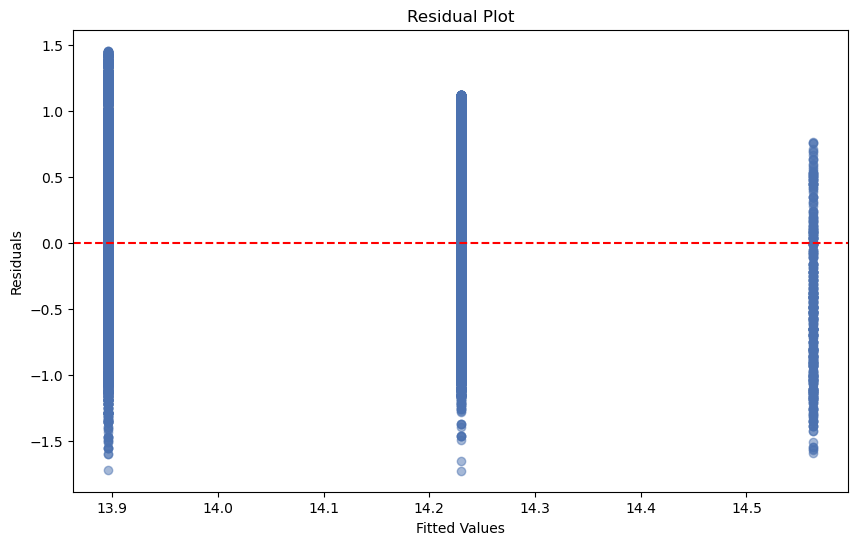

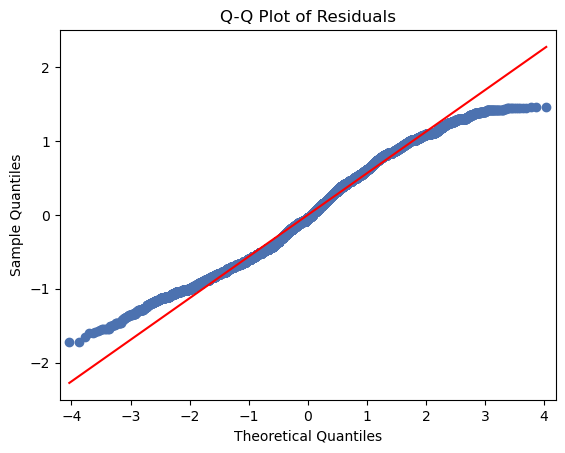

In [47]:

# Create a design matrix X by selecting the independent variables/features
X = cars_encoded[['Used']]
# Create the dependent variable y
y = cars_encoded['log_price']
# Create a design matrix X
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Residual Analysis: Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Normality of Residuals: Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


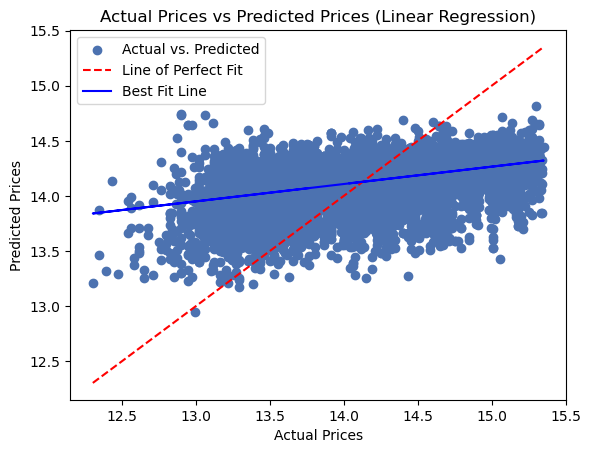

In [51]:
# Plotting actual vs predicted values with the best fit line
plt.scatter(y_test, y_pred, label="Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Line of Perfect Fit')

# Draw the best fit line
plt.plot(y_test, np.polyval(np.polyfit(y_test, y_pred, 1), y_test), color='blue', label='Best Fit Line')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.legend()
plt.savefig("visuals/actualvspredicted.png")
plt.show()

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0]
}

# Create the base model
linear_model = Ridge()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
final_model = Ridge(**best_params)
final_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_test = final_model.predict(X_test)

# Evaluate performance metrics
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error (RMSE) on Test Set:", rmse_test)

Best Hyperparameters: {'alpha': 10.0}
Root Mean Squared Error (RMSE) on Test Set: 1825672.3057219342
